<a href="https://colab.research.google.com/github/Eragon424/speech-tonality-analysis/blob/main/analysis_and_derivation_of_signs_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install webrtcvad==2.0.10
!pip install wave
!pip install pydub
!pip install simpleaudio
!pip install playsound

In [ ]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
notebook_path = os.path.abspath("notebook_path")
train_csv = os.path.join(os.path.dirname(notebook_path), "crowd_train/wavs/00000d522439136554c888f4cfd92131.wav")
with open(train_csv) as file:
    y, sr = librosa.load(train_csv)
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
#можем прослушать наш аудиофайл
IPython.display.Audio('crowd_train/wavs/00000d522439136554c888f4cfd92131.wav')

16000
длительность аудио в секундах 5.16
длительность аудио в минутах 0.08600000000000001


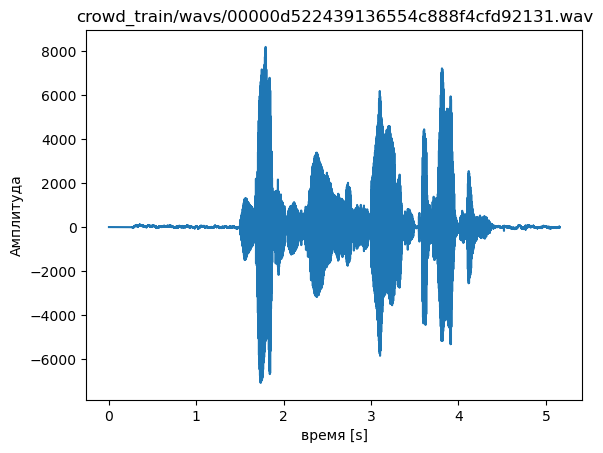

In [ ]:
# построения звукового сигнала
from scipy.io.wavfile import read
# чтение аудиофайла
samplerate, data = read('crowd_train/wavs/00000d522439136554c888f4cfd92131.wav')
# Частота кадров для аудио
print(samplerate)

# длительность аудио в секундах
duration = len(data)/samplerate
print("длительность аудио в секундах", duration)
print("длительность аудио в минутах", duration/60)

time = np.arange(0,duration,1/samplerate)

# Построение графика с помощью Matplotlib
plt.plot(time,data)
plt.xlabel('время [s]')
plt.ylabel('Амплитуда')
plt.title('crowd_train/wavs/00000d522439136554c888f4cfd92131.wav')
plt.show()

Анализ датасета душа

In [ ]:
сrowd_train = pd.read_csv('crowd_train/raw_crowd_train.tsv',delimiter = '	')
# функция выбора эмоции, если их оказалось 2 сразу. выбираем самую популярную, не нейтральую
def choose_emo(x):
    if isinstance(x, np.ndarray):
        for item in x:
            if item != 'neutral':
                return item
    return x
# выберем самый популярный ответ разметчиков и оставим его
сrowd_train_cl = сrowd_train.loc[:, :'duration'].groupby('hash_id', as_index = False).first()
сrowd_train_cl['annotator_emo'] = сrowd_train.groupby('hash_id', as_index = False)['annotator_emo'].\
agg(pd.Series.mode)['annotator_emo']

сrowd_train = сrowd_train_cl
сrowd_train['annotator_emo'] = сrowd_train['annotator_emo'].apply(choose_emo)

#сохраним фойл для признаков несбалансируемого датасета
сrowd_train['annotator_emo'].to_csv('y_train_full')

crowd_test_no_neutral = crowd_test[crowd_test.annotator_emo != 'neutral' ]
crowd_train_no_neutral = сrowd_train[сrowd_train.annotator_emo != 'neutral']
#crowd_train_no_neutral.to_csv('crowd_train_no_neutral')
#crowd_test_no_neutral.to_csv('crowd_test_no_neutral')

In [ ]:
сrowd_train

,hash_id,audio_path,duration,annotator_emo
0,00000d522439136554c888f4cfd92131,wavs/00000d522439136554c888f4cfd92131.wav,5.160000,neutral
1,000039c2bc753aa5a776621a4707eb73,wavs/000039c2bc753aa5a776621a4707eb73.wav,10.320000,neutral
2,000043e573826e21659ef9401d4ba84f,wavs/000043e573826e21659ef9401d4ba84f.wav,1.425625,neutral
3,000062a9bd8daf199cc520508902b304,wavs/000062a9bd8daf199cc520508902b304.wav,1.857187,neutral
4,000182128001302626efa6032d095cc8,wavs/000182128001302626efa6032d095cc8.wav,6.500000,neutral
...,...,...,...,...
184628,fffdcb6c9078c84c88d65752474c8945,wavs/fffdcb6c9078c84c88d65752474c8945.wav,3.080000,angry
184629,fffe6e2189d87d2bcf4e10fba9a4aa73,wavs/fffe6e2189d87d2bcf4e10fba9a4aa73.wav,3.134313,neutral
184630,fffeba24094a8cdf1737387158a8b220,wavs/fffeba24094a8cdf1737387158a8b220.wav,2.538312,neutral
184631,fffeefeeb5cc057d212d08dab33b9b56,wavs/fffeefeeb5cc057d212d08dab33b9b56.wav,2.730313,neutral


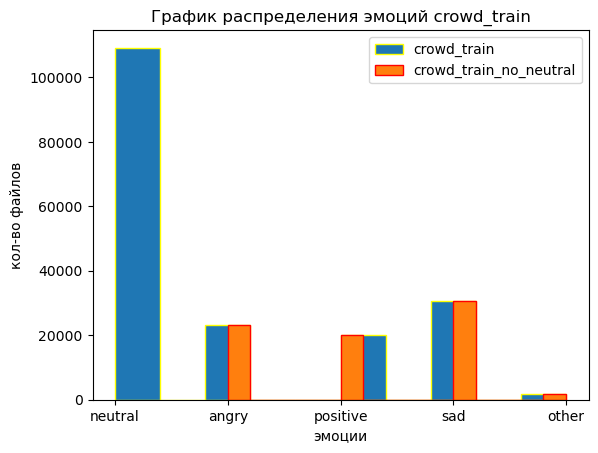

In [ ]:
# plotting first histogram
plt.title('График распределения эмоций crowd_train')
plt.xlabel('эмоции')
plt.ylabel('кол-во файлов')
plt.hist(сrowd_train['annotator_emo'], label='сrowd_train', bins= 10,edgecolor='yellow')

# plotting second histogram
plt.hist(crowd_train_no_neutral['annotator_emo'], label='crowd_train_no_neutral', bins= 15, edgecolor='red')

plt.legend()

# Showing the plot using plt.show()
plt.show()

(1.0, 17.0)

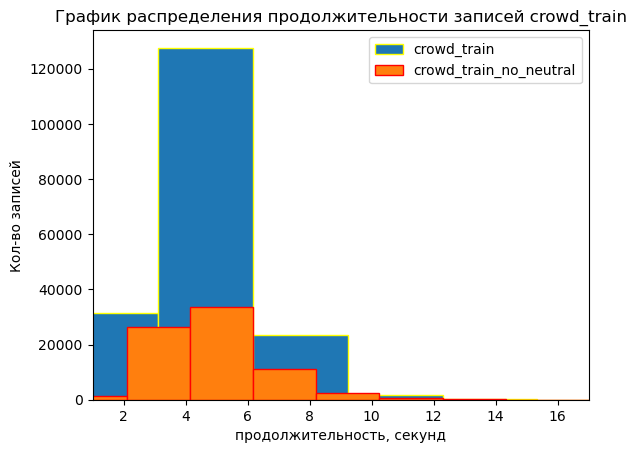

In [ ]:
plt.title('График распределения продолжительности записей crowd_train')
plt.xlabel('продолжительность, секунд')
plt.ylabel('Кол-во записей')
plt.hist(сrowd_train['duration'], label='crowd_train', bins= 10,edgecolor='yellow')
plt.hist(crowd_train_no_neutral['duration'], label='crowd_train_no_neutral', bins= 15,edgecolor='red')
plt.legend()
plt.xlim (1, 17)

подсчёт кол-ва и доли эмоций

In [ ]:
sum=len(сrowd_train)

In [ ]:
s = сrowd_train[сrowd_train.annotator_emo == 'positive']
n=len(s)+len(s1)
print('positive',n)
print(n/sum)
s1 = сrowd_train[сrowd_train.annotator_emo == 'sad']
n=len(s)
print('sad',n)
print(n/sum)
s1 = сrowd_train[сrowd_train.annotator_emo == 'angry']
n=len(s)
print('angry',n)
print(n/sum)
s1 = сrowd_train[сrowd_train.annotator_emo == 'other']
n=len(s)
print('other',n)
print(n/sum)
s1 = сrowd_train[сrowd_train.annotator_emo == 'neutral']
n=len(s)
print('neutral',n)
print(n/sum)

positive 21703
0.10752043596730246
sad 33677
0.16684171414416646
angry 25199
0.12484022789199901
other 2120
0.010502848649987614
neutral 119151
0.5902947733465445


In [ ]:
#удалим эмоции с пометкой другие
grouped = сrowd_train
df_train = grouped[grouped.annotator_emo != 'other' ]
df_train

(array([109186.,      0.,      0.,  23047.,      0.,      0.,  19930.,
             0.,      0.,  30589.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

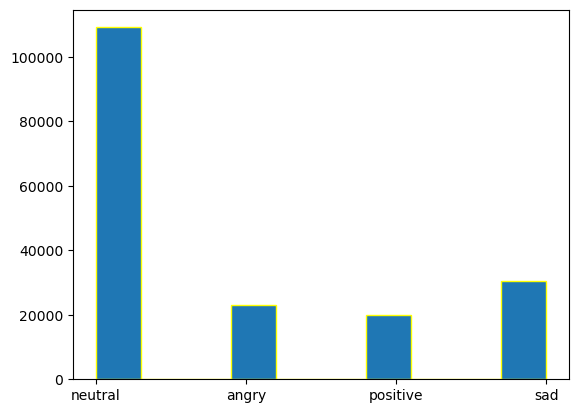

In [ ]:
plt.hist(df_train['annotator_emo'], label='crowd_train', bins= 10,edgecolor='yellow')

In [ ]:
#сбалансируем классы
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
df_balanced, balanced_labels = rus.fit_resample(df_train, df_train['annotator_emo'])

(array([19930.,     0.,     0., 19930.,     0.,     0., 19930.,     0.,
            0., 19930.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

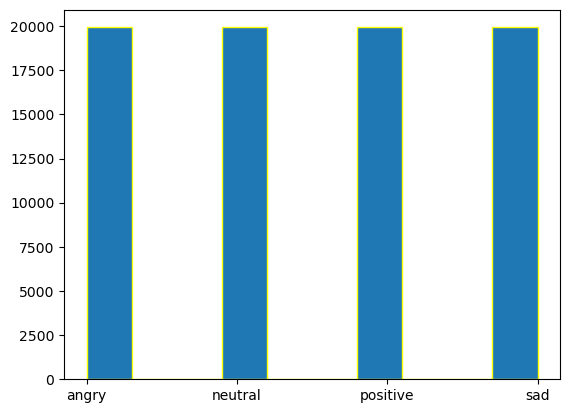

In [ ]:
#результат балансировки
plt.hist(df_balanced['annotator_emo'], label='сrowd_train', bins= 10,edgecolor='yellow')

(array([2.3749e+04, 4.7306e+04, 7.6910e+03, 7.6200e+02, 1.4700e+02,
        3.5000e+01, 1.6000e+01, 7.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([ 0.85875 ,  3.760875,  6.663   ,  9.565125, 12.46725 , 15.369375,
        18.2715  , 21.173625, 24.07575 , 26.977875, 29.88    ]),
 <BarContainer object of 10 artists>)

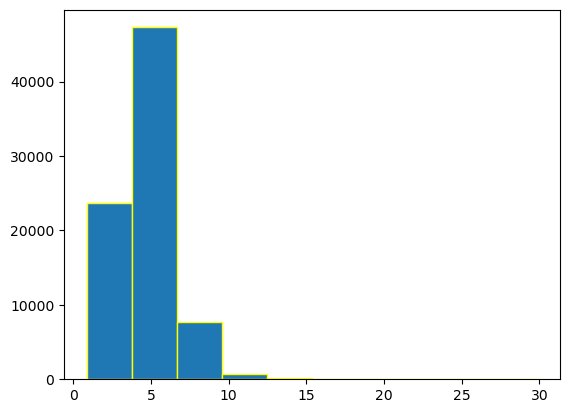

In [ ]:
plt.hist(df_balanced['duration'], label='crowd_train', bins= 10,edgecolor='yellow')

In [ ]:
#запишим сбалансированные данные в файл
df_balanced.to_csv('crowd_train_balance')

In [ ]:
#Попробуем извлечь в отдельную папку сбалансированные записи
import shutil

for i in df_balanced['audio_path']:
    way1 = 'crowd_train/'+i # 1 путь
    way2 = 'train_balance/wavs' # 2 путь
    shutil.copy(way1, way2)

In [ ]:
#Удалим тишину из наших сбалансированных данных
import wave
import struct

# train_balance
for i in сrowd_train['audio_path']:
    way1 = 'crowd_train/'+i # 1 путь
    way2 = 'train_no_balance_silence/wavs/'+i[5:] # 2 путь
    source = wave.open(way1, mode="rb")
    dest = wave.open(way2, mode="wb")
    dest.setparams(source.getparams())
    frames_count = source.getnframes()
    data = struct.unpack("<" + str(frames_count) + "h",
                         source.readframes(frames_count))
    newdata = list(filter(lambda x: abs(x) > 5, data))
    newframes = struct.pack("<" + str(len(newdata)) + "h", *newdata)
    dest.writeframes(newframes)
    source.close()
    dest.close()


#запишим признаки аудиофайлов в формат csv
audio_data = 'train_no_silence/wavs/dbc5087021dc58c3199219b34e54db6c.wav'
y, sr = librosa.load(audio_data)
df_train = pd.DataFrame({'y': [y], 'sr': [sr]})
for i in df_balanced['audio_path'][1::]:
    audio_data = 'train_no_silence/'+i
    y, sr = librosa.load(audio_data)
    df_train.loc[ len(df_train.index )] = [y,sr]
df_train = pd.read_csv('y,sr_train')

Библиотека librosa загружает и декорирует звук, как временной ряд.
y - представлен как одномерный массив numpy.
sr - содержит частоту дискретизации y, то есть количество отсчетов звука в секунду.
По умолчанию весь звук микшируется в моно и происходит Передискретизация до 22050 Гц во время загрузки.
Частота дискретизации (Sample Rate) - это количество аудио сэмпла, передаваемых в секунду, которое измеряется в Гц или кГц (число выборок аудиосигнала, приходящихся на секунду).

Библиотека librosa загружает и декорирует звук, как временной ряд.

y - представлен как одномерный массив numpy.

sr - содержит частоту дискретизации y, то есть количество отсчетов звука в секунду.


audio_data = '../input/audioset/Training_Data/human/human_00004.wav'
y, sr = librosa.load(audio_data)

Результатом является то, что временной ряд y был разделен на два временных ряда,
содержащих гармоническую и перкуссионную части сигнала.
Каждый из y_harmonic и y_percussive имеет ту же форму и продолжительность, что и y.

Выведение признаков MFCC

In [ ]:
#Вычисление MFCC

def extract_features(directory, file):
    name = f'{directory}/{file}'
    y, sr = librosa.load(name, mono=True, duration=5)

    features = []
    features.append(file) # filename
    features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr,
                                                              n_mfcc=20)])  # mfcc_mean<0..20>
    features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr,
                                                             n_mfcc=20)])   # mfcc_std

    # дополнительные признаки, при желании, можно добавить
    #features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T,
                           # axis = 0)[0])     # cent_mean
    #features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                          # axis = 0)[0])       # cent_std
    #features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                                #     axis = 0)[0])    # cent_skew
   # features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T,
                           # axis = 0)[0])      # rolloff_mean
    #features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T,
                          # axis = 0)[0])       # rolloff_std

    features.append(directory.split('/')[-1])
    return features

In [ ]:
#Cписки файлов train
wav_dir, _, wav_files = next(os.walk('train_no_balance_silence/wavs'))
print(f"waw_files: {len(wav_files)}")
wav_dir

waw_files: 184633


'train_no_balance_silence/wavs'

In [ ]:
import csv
buffer = []
buffer_size = 5000
buffer_counter = 0

# Создание заголовка для файла CSV.
header = ['filename']
header.extend([f'mfcc_mean{i}' for i in range(1, 21)])
header.extend([f'mfcc_std{i}' for i in range(1, 21)])
header.extend(['label'])

with open('pr__balance_no_silince_train.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(header)
    for directory, files in [(wav_dir, wav_files)]:
        for file in files:
            features = extract_features(directory, file)
            if buffer_counter + 1 == buffer_size:
                buffer.append(features)
                writer.writerows(buffer)
                print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
                buffer = []
                buffer_counter = 0
            else:
                buffer.append(features)
                buffer_counter += 1
        if buffer:
            writer.writerows(buffer)
            print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
        print(f"- [{directory.split('/')[-1]}] Writing complete")
        buffer = []
        buffer_counter = 0

столбец ‘filename’, где указан номер и название файла (Аудиофайлы);
столбцы ‘mfcc_mean{i}’ и ‘mfcc_std{i}’ - средние значения и стандартные отклонения (по 20 значений) из Мел-кепстральных коэффициентов;
столбцы 'cent_mean', 'cent_std', 'cent_skew' - среднее значение, стандартное отклонение и skew (наклон) из Спектрального центроида;
столбцы 'rolloff_mean', 'rolloff_std' - среднее значение и стандартное отклонение из Спектрального спада ;
столбец ‘label’ метка.

In [ ]:
data_x_train = pd.read_csv('dataset__balance_no_silince_train.csv')
data_x_train

,filename,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,...,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,cent_mean,label
0,00000d522439136554c888f4cfd92131.wav,-467.08884,67.734410,13.555082,38.741455,-7.167416,0.597688,-20.886284,15.138917,-8.795949,...,8.588613,8.318792,6.618607,7.076600,7.222637,7.806918,5.388669,7.536538,wavs,NaN
1,000039c2bc753aa5a776621a4707eb73.wav,-455.32877,69.964820,-28.523523,32.344345,-21.611555,-1.738283,-29.974870,-2.658362,-27.071587,...,7.017729,5.085210,5.052448,5.966898,4.432629,5.499484,4.201167,8.535248,wavs,NaN
2,000043e573826e21659ef9401d4ba84f.wav,-324.05480,115.785450,-21.114456,35.512660,-13.603605,-4.507683,-6.577841,-9.184050,-18.723753,...,18.828270,9.352553,10.229453,9.870971,6.685668,7.650016,10.031831,6.412236,wavs,NaN
3,000062a9bd8daf199cc520508902b304.wav,-412.43720,120.690140,4.870650,44.868004,-22.577837,15.440735,-18.214250,3.675842,-6.553605,...,6.921843,4.515031,5.963138,6.237720,5.724922,4.901245,5.649538,4.081949,wavs,NaN
4,000182128001302626efa6032d095cc8.wav,-477.00810,113.069885,-34.195324,34.832405,-21.345510,25.681898,-27.018713,4.594828,-17.452380,...,7.554842,7.380126,8.139834,7.889399,5.080637,6.300990,5.740642,5.134631,wavs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184628,fffdcb6c9078c84c88d65752474c8945.wav,-406.72284,103.964610,-42.010303,60.079086,-42.139908,36.664444,-42.244087,19.113665,-19.777035,...,5.468694,5.583583,5.220826,6.555201,5.548795,5.608561,5.275757,4.273073,wavs,NaN
184629,fffe6e2189d87d2bcf4e10fba9a4aa73.wav,-310.43698,161.317870,-11.443884,39.847830,13.334776,28.219568,7.392763,11.241220,-1.343260,...,7.814247,11.815525,8.904210,9.721940,6.524000,6.089618,7.029152,5.702905,wavs,NaN
184630,fffeba24094a8cdf1737387158a8b220.wav,-266.47668,124.357830,-9.233796,25.878456,-13.423601,-8.512863,-30.396950,1.176547,-5.997843,...,10.373017,6.366199,7.475891,10.202706,7.864334,9.025516,6.211788,5.641520,wavs,NaN
184631,fffeefeeb5cc057d212d08dab33b9b56.wav,-385.38248,154.218920,-13.083211,22.870913,14.446136,26.102562,-9.495589,8.869211,-1.466560,...,7.554702,9.499482,9.867852,6.452058,7.535012,8.333311,6.215310,6.899868,wavs,NaN


In [ ]:
data_x_train = pd.read_csv('pr__balance_no_silince_train.csv')
data_x_train

,filename,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,...,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,label
0,00000d522439136554c888f4cfd92131.wav,-467.08884,67.734410,13.555082,38.741455,-7.167416,0.597688,-20.886284,15.138917,-8.795949,...,9.971217,8.588613,8.318792,6.618607,7.076600,7.222637,7.806918,5.388669,7.536538,wavs
1,000039c2bc753aa5a776621a4707eb73.wav,-455.32877,69.964820,-28.523523,32.344345,-21.611555,-1.738283,-29.974870,-2.658362,-27.071587,...,6.895723,7.017729,5.085210,5.052448,5.966898,4.432629,5.499484,4.201167,8.535248,wavs
2,000043e573826e21659ef9401d4ba84f.wav,-324.05480,115.785450,-21.114456,35.512660,-13.603605,-4.507683,-6.577841,-9.184050,-18.723753,...,13.955037,18.828270,9.352553,10.229453,9.870971,6.685668,7.650016,10.031831,6.412236,wavs
3,000062a9bd8daf199cc520508902b304.wav,-412.43720,120.690140,4.870650,44.868004,-22.577837,15.440735,-18.214250,3.675842,-6.553605,...,8.249008,6.921843,4.515031,5.963138,6.237720,5.724922,4.901245,5.649538,4.081949,wavs
4,000182128001302626efa6032d095cc8.wav,-477.00810,113.069885,-34.195324,34.832405,-21.345510,25.681898,-27.018713,4.594828,-17.452380,...,7.178211,7.554842,7.380126,8.139834,7.889399,5.080637,6.300990,5.740642,5.134631,wavs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184628,fffdcb6c9078c84c88d65752474c8945.wav,-406.72284,103.964610,-42.010303,60.079086,-42.139908,36.664444,-42.244087,19.113665,-19.777035,...,7.011998,5.468694,5.583583,5.220826,6.555201,5.548795,5.608561,5.275757,4.273073,wavs
184629,fffe6e2189d87d2bcf4e10fba9a4aa73.wav,-310.43698,161.317870,-11.443884,39.847830,13.334776,28.219568,7.392763,11.241220,-1.343260,...,10.446842,7.814247,11.815525,8.904210,9.721940,6.524000,6.089618,7.029152,5.702905,wavs
184630,fffeba24094a8cdf1737387158a8b220.wav,-266.47668,124.357830,-9.233796,25.878456,-13.423601,-8.512863,-30.396950,1.176547,-5.997843,...,10.141130,10.373017,6.366199,7.475891,10.202706,7.864334,9.025516,6.211788,5.641520,wavs
184631,fffeefeeb5cc057d212d08dab33b9b56.wav,-385.38248,154.218920,-13.083211,22.870913,14.446136,26.102562,-9.495589,8.869211,-1.466560,...,7.247082,7.554702,9.499482,9.867852,6.452058,7.535012,8.333311,6.215310,6.899868,wavs
